In [ ]:
 !pip install pyspark

In [ ]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession  # Import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("MySparkApp").getOrCreate()


# Load the dataset
file_path = '/content/cars_info.csv'  # Ganti dengan path file Anda
data = spark.read.csv(file_path, header=True, inferSchema=True)

df = data.toPandas()

# 1. Periksa tipe data
print("Tipe data awal:")
print(df.dtypes)

# 2. Ganti nama kolom (misalnya, jika ada spasi atau karakter khusus)
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

# 3. Periksa nilai null
print("\nJumlah nilai null per kolom:")
print(df.isnull().sum())

# 4. Isi atau hapus nilai null (contoh: isi dengan rata-rata untuk kolom numerik)
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# 5. Ubah tipe data jika diperlukan (misalnya, ubah kolom yang seharusnya kategori)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['kilometers'] = pd.to_numeric(df['kilometers'], errors='coerce')
df['cc'] = pd.to_numeric(df['cc'], errors='coerce')
df['seating_capacity'] = pd.to_numeric(df['seating_capacity'], errors='coerce')

# Simpan hasil preprocessing ke file CSV
output_file_path = '/content/preprocessed_cars_info.csv'  # Ganti dengan lokasi penyimpanan yang Anda inginkan
df.to_csv(output_file_path, index=False)

# Tampilkan pesan untuk unduhan
print(f"Hasil preprocessing telah disimpan ke {output_file_path}.")


Tipe data awal:
ID                   int32
Name                object
Price                int32
Brand               object
Model               object
Variant             object
Series              object
Year                 int32
Kilometers           int32
Type                object
Gearbox             object
Fuel                object
Status              object
CC                   int32
Color               object
Seating Capacity     int32
dtype: object

Jumlah nilai null per kolom:
id                  0
name                0
price               0
brand               0
model               0
variant             0
series              0
year                0
kilometers          0
type                0
gearbox             0
fuel                0
status              0
cc                  0
color               0
seating_capacity    0
dtype: int64
Hasil preprocessing telah disimpan ke /content/preprocessed_cars_info.csv.


<ipython-input-2-f886859b500b>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
from google.colab import files
files.download(output_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Ringkasan data:
                 id          price          year    kilometers            cc  \
count  1.704800e+04   17048.000000  17048.000000  1.704800e+04  17048.000000   
mean   1.279027e+07   36777.778038   2015.481288  1.032314e+05   2491.830303   
std    5.051111e+04   30305.015328      4.721591  8.041313e+04    881.985562   
min    1.153013e+07    1000.000000   1989.000000  1.000000e+00    875.000000   
25%    1.275715e+07   18800.000000   2013.000000  4.450225e+04   1987.000000   
50%    1.280207e+07   29990.000000   2016.000000  8.845400e+04   2354.000000   
75%    1.283131e+07   45990.000000   2019.000000  1.488735e+05   2981.000000   
max    1.285246e+07  999000.000000   2022.000000  2.700000e+06   7300.000000   

       seating_capacity  
count      17048.000000  
mean           5.115849  
std            1.121791  
min            2.000000  
25%            5.000000  
50%            5.000000  
75%            5.000000  
max           14.000000  

Matriks korelasi:
         

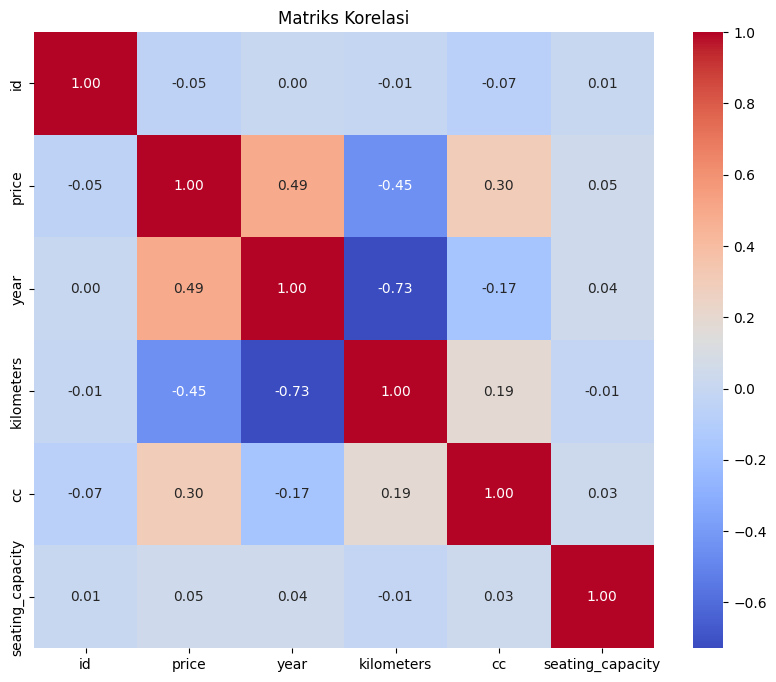

In [ ]:
# 6. Tampilkan ringkasan data
print("\nRingkasan data:")
print(df.describe())

# 7. Tampilkan matriks korelasi
print("\nMatriks korelasi:")
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
print(numerical_df.corr())

# Jika ingin menampilkan matriks korelasi dalam bentuk heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

<ipython-input-5-fdb06b9fface>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")


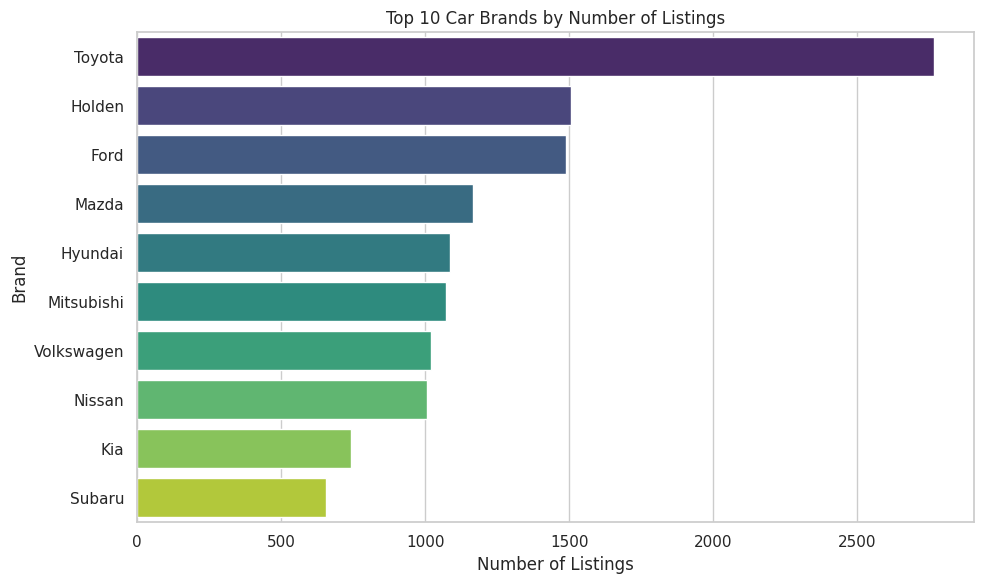

In [ ]:
import seaborn as sns

# Set style for plots
sns.set_theme(style="whitegrid")

# 1. Bar chart: Top 10 car brands by number of listings
top_brands = df['brand'].value_counts().head(10) # Changed 'Brand' to 'brand'
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")
plt.title("Top 10 Car Brands by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()



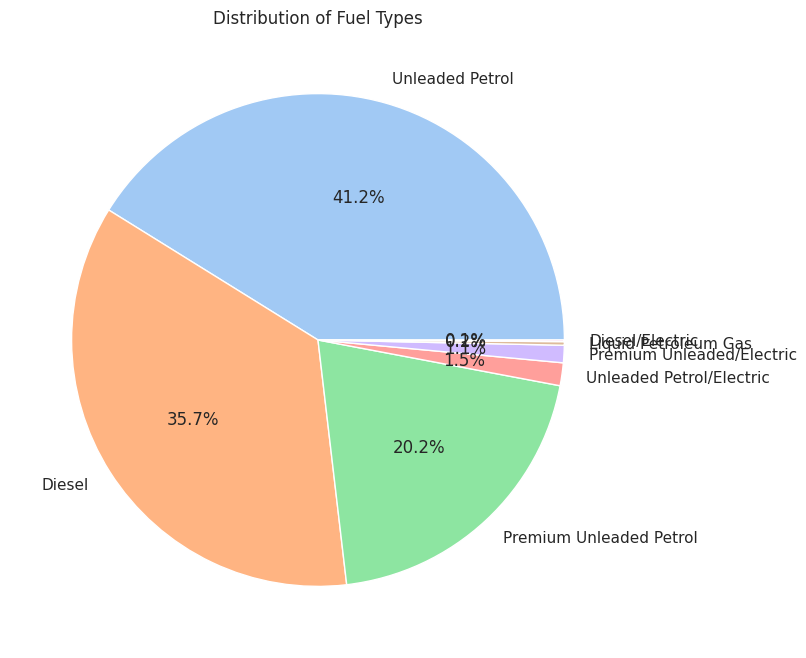

In [ ]:
import seaborn as sns

# Set style for plots
sns.set_theme(style="whitegrid")

# 2. Pie chart: Distribution of fuel types
fuel_distribution = df['fuel'].value_counts()
plt.figure(figsize=(8, 8))
fuel_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Distribution of Fuel Types")
plt.ylabel('')  # Remove y-axis label for clarity
plt.show()

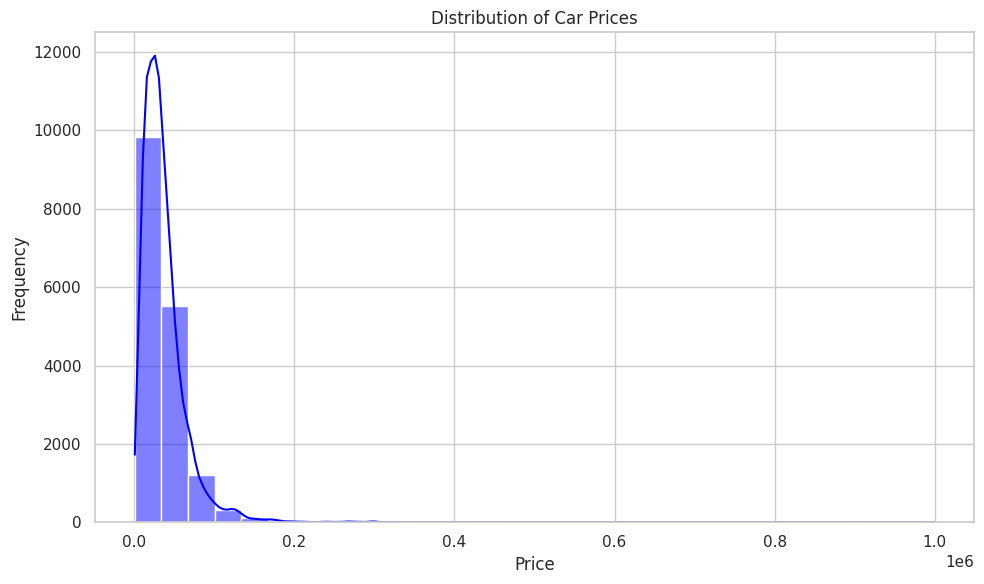

In [ ]:
import seaborn as sns

# Set style for plots
sns.set_theme(style="whitegrid")

# 3. Histogram: Distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color="blue")
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


<ipython-input-8-a66481031a3b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gearbox", y="price", data=df, palette="coolwarm") # Changed 'Gearbox' to 'gearbox' and 'Price' to 'price'


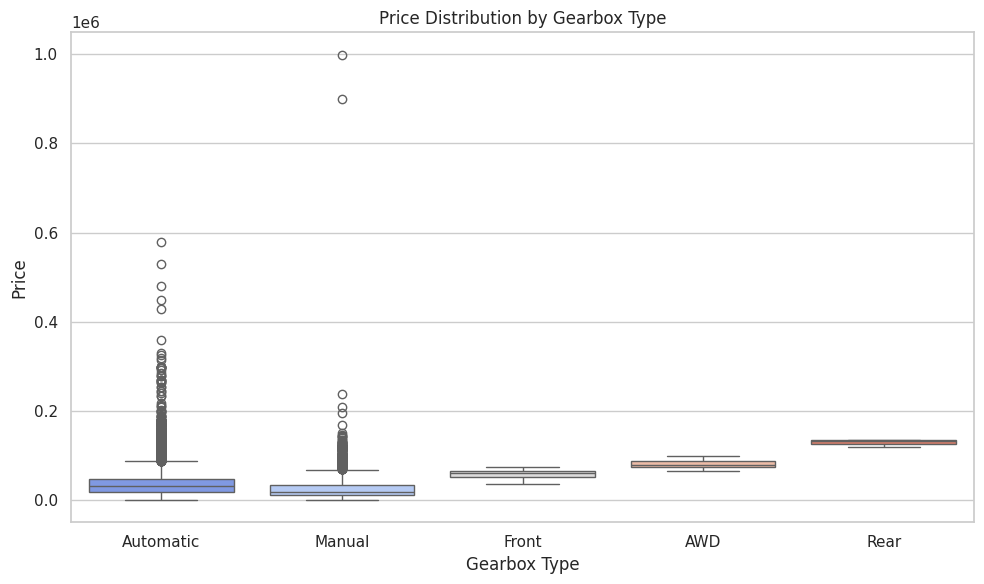

In [ ]:
import seaborn as sns

# Set style for plots
sns.set_theme(style="whitegrid")
# 4. Boxplot: Price distribution by gearbox type
plt.figure(figsize=(10, 6))
sns.boxplot(x="gearbox", y="price", data=df, palette="coolwarm") # Changed 'Gearbox' to 'gearbox' and 'Price' to 'price'
plt.title("Price Distribution by Gearbox Type")
plt.xlabel("Gearbox Type")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

In [ ]:
from pyspark.sql.functions import when, lit
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# Initialize Spark session
spark = SparkSession.builder.appName("RandomForestClassification").getOrCreate()

# Load preprocessed dataset
file_path = "/content/preprocessed_cars_info.csv"  # Update with your file path
df = spark.read.csv(file_path, header=True, inferSchema=True)

df = df.withColumn("Affordable", when(df["price"] < 15000, lit(1)).otherwise(lit(0)))


# Split data into training and testing sets
(train_data, test_data) = df.randomSplit([0.7, 0.3], seed=42)  # Adjust seed as needed

# Assemble features into a single vector column
feature_assembler = VectorAssembler(
    inputCols=['year', 'kilometers', 'cc', 'seating_capacity'],  # Replace with your actual feature columns
    outputCol='features'
)
train_data = feature_assembler.transform(train_data) # apply feature assembler for train_data
test_data = feature_assembler.transform(test_data) # apply feature assembler for test_data



# Build and train Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="Affordable", numTrees=100, maxDepth=10)
rf_model = rf.fit(train_data)

# Make predictions
rf_predictions = rf_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="Affordable", metricName="accuracy")
accuracy = evaluator.evaluate(rf_predictions)
print(f"Random Forest Accuracy: {accuracy}")

# Additional metrics
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="Affordable", metricName="f1")
f1_score = evaluator_f1.evaluate(rf_predictions)
print(f"Random Forest F1 Score: {f1_score}")

# Stop Spark session
spark.stop()


Random Forest Accuracy: 0.9302186878727634
Random Forest F1 Score: 0.9299073126100834


In [ ]:
from pyspark.sql.functions import when, lit
from pyspark.sql import SparkSession
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# Initialize Spark session
spark = SparkSession.builder.appName("GradientBoostedTreeClassification").getOrCreate()

# Load preprocessed dataset
file_path = "/content/preprocessed_cars_info.csv"  # Update with your file path
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Create binary label column
df = df.withColumn("Affordable", when(df["price"] < 15000, lit(1)).otherwise(lit(0)))

# Split data into training and testing sets
(train_data, test_data) = df.randomSplit([0.7, 0.3], seed=42)  # Adjust seed as needed

# Assemble features into a single vector column
feature_assembler = VectorAssembler(
    inputCols=['year', 'kilometers', 'cc', 'seating_capacity'],  # Replace with your actual feature columns
    outputCol='features'
)
train_data = feature_assembler.transform(train_data)  # Apply feature assembler for train_data
test_data = feature_assembler.transform(test_data)  # Apply feature assembler for test_data

# Build and train Gradient Boosted Tree model
gbt = GBTClassifier(featuresCol="features", labelCol="Affordable", maxIter=100, maxDepth=10)
gbt_model = gbt.fit(train_data)

# Make predictions
gbt_predictions = gbt_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="Affordable", metricName="accuracy")
accuracy = evaluator.evaluate(gbt_predictions)
print(f"Gradient Boosted Tree Accuracy: {accuracy}")

# Additional metrics
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="Affordable", metricName="f1")
f1_score = evaluator_f1.evaluate(gbt_predictions)
print(f"Gradient Boosted Tree F1 Score: {f1_score}")

# Stop Spark session
spark.stop()


Gradient Boosted Tree Accuracy: 0.9196819085487078
Gradient Boosted Tree F1 Score: 0.9202978324654103


In [ ]:
from pyspark.sql.functions import when, lit
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("KNNClassification").getOrCreate()

# Load preprocessed dataset
file_path = "/content/preprocessed_cars_info.csv"  # Update with your file path
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Create binary label column
df = df.withColumn("Affordable", when(df["price"] < 15000, lit(1)).otherwise(lit(0)))

# Assemble features into a single vector column
feature_assembler = VectorAssembler(
    inputCols=['year', 'kilometers', 'cc', 'seating_capacity'],  # Replace with your actual feature columns
    outputCol='features'
)
df = feature_assembler.transform(df)

# Convert to Pandas DataFrame for scikit-learn
pandas_df = df.select('features', 'Affordable').toPandas()
features = pd.DataFrame(pandas_df['features'].tolist())
labels = pandas_df['Affordable']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy}")
print(f"KNN F1 Score: {f1}")

# Stop Spark session
spark.stop()


KNN Accuracy: 0.8543499511241447
KNN F1 Score: 0.5525525525525525


In [ ]:
from pyspark.sql.functions import when, lit
from pyspark.sql import SparkSession
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# Initialize Spark session
spark = SparkSession.builder.appName("MLPClassification").getOrCreate()

# Load preprocessed dataset
file_path = "/content/preprocessed_cars_info.csv"  # Update with your file path
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Create binary label column
df = df.withColumn("Affordable", when(df["price"] < 15000, lit(1)).otherwise(lit(0)))

# Assemble features into a single vector column
feature_assembler = VectorAssembler(
    inputCols=['year', 'kilometers', 'cc', 'seating_capacity'],  # Replace with your actual feature columns
    outputCol='features'
)
df = feature_assembler.transform(df)

# Split data into training and testing sets
(train_data, test_data) = df.randomSplit([0.7, 0.3], seed=42)  # Adjust seed as needed

# Build and train MLP model
layers = [4, 5, 4, 2]  # Input layer (4 features), 2 hidden layers, output layer (2 classes)
mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol="Affordable", maxIter=100, layers=layers, blockSize=128, seed=42)
mlp_model = mlp.fit(train_data)

# Make predictions
mlp_predictions = mlp_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="Affordable", metricName="accuracy")
accuracy = evaluator.evaluate(mlp_predictions)
print(f"MLP Accuracy: {accuracy}")

# Additional metrics
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="Affordable", metricName="f1")
f1_score = evaluator_f1.evaluate(mlp_predictions)
print(f"MLP F1 Score: {f1_score}")

# Stop Spark session
spark.stop()


MLP Accuracy: 0.8294234592445328
MLP F1 Score: 0.7520875183586591


In [ ]:
from pyspark.sql.functions import when, lit
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize Spark session
spark = SparkSession.builder.appName("ModelComparison").getOrCreate()

# Load preprocessed dataset
file_path = "/content/preprocessed_cars_info.csv"  # Update with your file path
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Create binary label column
df = df.withColumn("Affordable", when(df["price"] < 15000, lit(1)).otherwise(lit(0)))

# Assemble features into a single vector column
feature_assembler = VectorAssembler(
    inputCols=['year', 'kilometers', 'cc', 'seating_capacity'],  # Replace with your actual feature columns
    outputCol='features'
)
df = feature_assembler.transform(df)

# Split data into training and testing sets
(train_data, test_data) = df.randomSplit([0.7, 0.3], seed=42)  # Adjust seed as needed

# Initialize evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Affordable", metricName="accuracy")

# ---- RANDOM FOREST ----
rf = RandomForestClassifier(featuresCol="features", labelCol="Affordable", numTrees=100, maxDepth=10)
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)
rf_accuracy = evaluator.evaluate(rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

# ---- GRADIENT BOOSTED TREE ----
gbt = GBTClassifier(featuresCol="features", labelCol="Affordable", maxIter=100, maxDepth=10)
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)
gbt_accuracy = evaluator.evaluate(gbt_predictions)
print(f"Gradient Boosted Tree Accuracy: {gbt_accuracy}")

# ---- K-NEAREST NEIGHBORS (KNN) ----
# Convert Spark DataFrame to Pandas DataFrame for KNN
pandas_df = df.select('features', 'Affordable').toPandas()
features = pd.DataFrame(pandas_df['features'].tolist())
labels = pandas_df['Affordable']

# Split Pandas DataFrame for KNN
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy}")

# ---- MULTI-LAYER PERCEPTRON (MLP) ----
layers = [4, 5, 4, 2]  # Input layer (4 features), 2 hidden layers, output layer (2 classes)
mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol="Affordable", maxIter=100, layers=layers, blockSize=128, seed=42)
mlp_model = mlp.fit(train_data)
mlp_predictions = mlp_model.transform(test_data)
mlp_accuracy = evaluator.evaluate(mlp_predictions)
print(f"MLP Accuracy: {mlp_accuracy}")

# ---- COMPARE MODELS ----
model_accuracies = {
    "Random Forest": rf_accuracy,
    "Gradient Boosted Tree": gbt_accuracy,
    "KNN": knn_accuracy,
    "MLP": mlp_accuracy
}

print("\nModel Accuracy Comparison:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

# Stop Spark session
spark.stop()


Random Forest Accuracy: 0.9302186878727634
Gradient Boosted Tree Accuracy: 0.9196819085487078
KNN Accuracy: 0.8543499511241447
MLP Accuracy: 0.8294234592445328

Model Accuracy Comparison:
Random Forest: 0.9302
Gradient Boosted Tree: 0.9197
KNN: 0.8543
MLP: 0.8294


In [ ]:
from pyspark.sql.functions import when, lit
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize Spark session
spark = SparkSession.builder.appName("ModelComparison").getOrCreate()

# Load preprocessed dataset
file_path = "/content/preprocessed_cars_info.csv"  # Update with your file path
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Create binary label column
df = df.withColumn("Affordable", when(df["price"] < 15000, lit(1)).otherwise(lit(0)))

# Assemble features into a single vector column
feature_assembler = VectorAssembler(
    inputCols=['year', 'kilometers', 'cc', 'seating_capacity'],  # Replace with your actual feature columns
    outputCol='features'
)
df = feature_assembler.transform(df)

# Split data into training and testing sets
(train_data, test_data) = df.randomSplit([0.7, 0.3], seed=42)  # Adjust seed as needed

# Initialize evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Affordable", metricName="accuracy")

# ---- RANDOM FOREST WITH HYPERPARAMETER TUNING ----
rf = RandomForestClassifier(featuresCol="features", labelCol="Affordable")

# Define hyperparameter grid for RF
rf_param_grid = ParamGridBuilder()\
    .addGrid(rf.numTrees, [50, 100, 150])\
    .addGrid(rf.maxDepth, [5, 10, 15])\
    .build()

# Cross-validator for RF
rf_cv = CrossValidator(
    estimator=rf,
    estimatorParamMaps=rf_param_grid,
    evaluator=evaluator,
    numFolds=3
)

# Fit RF model with cross-validation
rf_cv_model = rf_cv.fit(train_data)
rf_best_model = rf_cv_model.bestModel
rf_best_predictions = rf_best_model.transform(test_data)
rf_best_accuracy = evaluator.evaluate(rf_best_predictions)
print(f"Random Forest Best Accuracy: {rf_best_accuracy}")

# ---- GRADIENT BOOSTED TREE WITH HYPERPARAMETER TUNING ----
gbt = GBTClassifier(featuresCol="features", labelCol="Affordable")

# Define hyperparameter grid for GBT
gbt_param_grid = ParamGridBuilder()\
    .addGrid(gbt.maxIter, [50, 100, 150])\
    .addGrid(gbt.maxDepth, [5, 10, 15])\
    .build()

# Cross-validator for GBT
gbt_cv = CrossValidator(
    estimator=gbt,
    estimatorParamMaps=gbt_param_grid,
    evaluator=evaluator,
    numFolds=3
)

# Fit GBT model with cross-validation
gbt_cv_model = gbt_cv.fit(train_data)
gbt_best_model = gbt_cv_model.bestModel
gbt_best_predictions = gbt_best_model.transform(test_data)
gbt_best_accuracy = evaluator.evaluate(gbt_best_predictions)
print(f"Gradient Boosted Tree Best Accuracy: {gbt_best_accuracy}")

# ---- K-NEAREST NEIGHBORS (KNN) ----
# Convert Spark DataFrame to Pandas DataFrame for KNN
pandas_df = df.select('features', 'Affordable').toPandas()
features = pd.DataFrame(pandas_df['features'].tolist())
labels = pandas_df['Affordable']

# Split Pandas DataFrame for KNN
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy}")

# ---- MULTI-LAYER PERCEPTRON (MLP) ----
layers = [4, 5, 4, 2]  # Input layer (4 features), 2 hidden layers, output layer (2 classes)
mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol="Affordable", maxIter=100, layers=layers, blockSize=128, seed=42)
mlp_model = mlp.fit(train_data)
mlp_predictions = mlp_model.transform(test_data)
mlp_accuracy = evaluator.evaluate(mlp_predictions)
print(f"MLP Accuracy: {mlp_accuracy}")

# ---- COMPARE MODELS ----
model_accuracies = {
    "Random Forest (Tuned)": rf_best_accuracy,
    "Gradient Boosted Tree (Tuned)": gbt_best_accuracy,
    "KNN": knn_accuracy,
    "MLP": mlp_accuracy
}

print("\nModel Accuracy Comparison:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

# Stop Spark session
spark.stop()


Random Forest Best Accuracy: 0.9294234592445328
